--- 

### DSGA1007

--- 

### HW05 

### Due Date: Sunday 2021-11-14, 8PM


#### Student Name: Jean An

#### Student NetID: cya220

In this HW we continue the analysis of the data "StudentsPerformance.csv" presented in Lab08:

``data is adapted from a dataset from kaggle:  
https://www.kaggle.com/spscientist/students-performance-in-exams``

The dataset "StudentsPerformance.csv" has been posted under Content for Lab08. Please download "StudentsPerformance.csv" from Brightspace.

**Problem 1.1 (Points 5)** 

Read the data by using `pandas`. 

In [1]:
import pandas as pd

df = pd.read_csv('StudentsPerformance.csv')
df

,gender,group,test preparation course,math score,reading score,writing score
0,female,group B,none,72.0,72,74.0
1,female,group C,completed,69.0,90,88.0
2,female,group B,none,NaN,95,NaN
3,male,group A,none,47.0,57,44.0
4,male,group C,none,76.0,78,75.0
...,...,...,...,...,...,...
995,female,group E,completed,88.0,99,95.0
996,male,group C,none,NaN,55,55.0
997,female,group C,completed,59.0,71,65.0
998,female,group D,completed,68.0,78,77.0


**Problem 1.2 (Points 5)** 

Print first 10 rows of the data.

In [2]:
df.head(n=10)

,gender,group,test preparation course,math score,reading score,writing score
0,female,group B,none,72.0,72,74.0
1,female,group C,completed,69.0,90,88.0
2,female,group B,none,NaN,95,NaN
3,male,group A,none,47.0,57,44.0
4,male,group C,none,76.0,78,75.0
5,female,group B,none,71.0,83,78.0
6,female,group B,completed,88.0,95,92.0
7,male,group B,none,40.0,43,39.0
8,male,group D,completed,64.0,64,67.0
9,female,group B,none,38.0,60,50.0


**Problem 1.3 (Points 5)**

How many different groups are there in this data set?

In [3]:
print("There are "+str(len(df.group.unique()))+" different groups in this data set.")

There are 5 different groups in this data set.


**Problem 1.4 (Points 5)**

Print all different groups in this data set:

In [4]:
for i in sorted(df.group.unique()):
    print(i)

group A
group B
group C
group D
group E


**Problem 1.5 (Points 10)**

For each group print the number of female and the number of male members: 

In [5]:
df.groupby(['group','gender'])['gender'].count()

group    gender
group A  female     36
         male       53
group B  female    104
         male       86
group C  female    180
         male      139
group D  female    129
         male      133
group E  female     69
         male       71
Name: gender, dtype: int64

**Problem 1.6 (Points 10)**

For each group print the percent of female and the percent of male members:

In [6]:
df.groupby(['group','gender'])['gender'].count()/df.groupby(['group'])['group'].count()

group    gender
group A  female    0.404494
         male      0.595506
group B  female    0.547368
         male      0.452632
group C  female    0.564263
         male      0.435737
group D  female    0.492366
         male      0.507634
group E  female    0.492857
         male      0.507143
dtype: float64

**Problem 1.7 (Points 20)**

For each of the groups plot the histogram over `math_score`. In your plots set number of bins to be `bins=50`
Note: You can plot one figure per group.

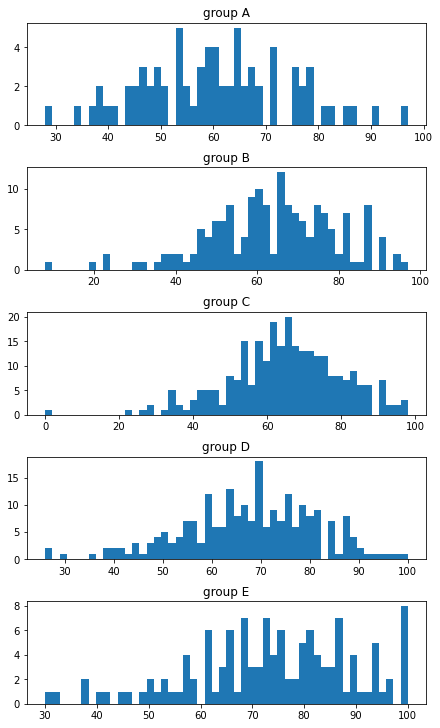

In [7]:
import matplotlib.pyplot as plt

p = sorted(df.group.unique())

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(6,10), constrained_layout=True)
    
for i in range(len(p)):
    axes[i].hist(df[df['group'] == p[i]]['math score'], bins = 50)
    axes[i].set(title = p[i])

plt.show()

**Problem 1.8 (Points 20)**


Make three diagrams that present `2D` scatter plots, where the axes are taking the column values from the data set. So the three diagrams will have the following axes: 
    
diag1: x="math score", y="reading score"

diag2: x="math score", y="writing score"

diag3: x="reading score", y="writing score"



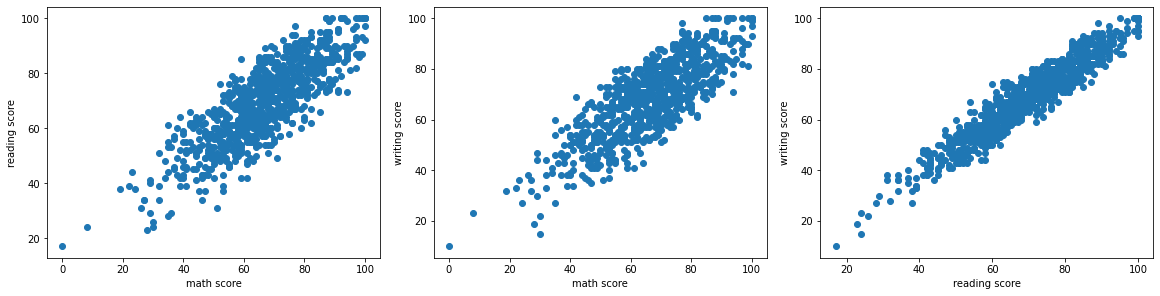

In [8]:
x = ['math score','math score','reading score']
y = ['reading score','writing score','writing score']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,4), constrained_layout=True)
    
for i in range(len(x)):
    axes[i].scatter(df[x[i]],df[y[i]])
    axes[i].set(xlabel=x[i], ylabel=y[i])

plt.show()

**Problem 1.9 (Points 20)**

Normalize each of the three columns `math score`, `reading score`, `writing score` by subtracting its mean value and dividing by its standard deviation, and form three new columns: `math_score_norm`, `reading_score_norm`, `writing_score_norm`, respectively.

Perform the same task the one above (1.8) on these newly formed columns.  

In [9]:
scores = ['math score','reading score','writing score']

for score in scores:
    name = str(score.replace(" ", "_"))
    df[name+'_norm'] = (df[score] - df[score].mean()) / df[score].std()

df

,gender,group,test preparation course,math score,reading score,writing score,math_score_norm,reading_score_norm,writing_score_norm
0,female,group B,none,72.0,72,74.0,0.373118,0.194301,0.392749
1,female,group C,completed,69.0,90,88.0,0.176997,1.427086,1.320625
2,female,group B,none,NaN,95,NaN,NaN,1.769526,NaN
3,male,group A,none,47.0,57,44.0,-1.261226,-0.833020,-1.595557
4,male,group C,none,76.0,78,75.0,0.634613,0.605229,0.459026
...,...,...,...,...,...,...,...,...,...
995,female,group E,completed,88.0,99,95.0,1.419098,2.043479,1.784563
996,male,group C,none,NaN,55,55.0,NaN,-0.969997,-0.866511
997,female,group C,completed,59.0,71,65.0,-0.476741,0.125813,-0.203743
998,female,group D,completed,68.0,78,77.0,0.111623,0.605229,0.591580


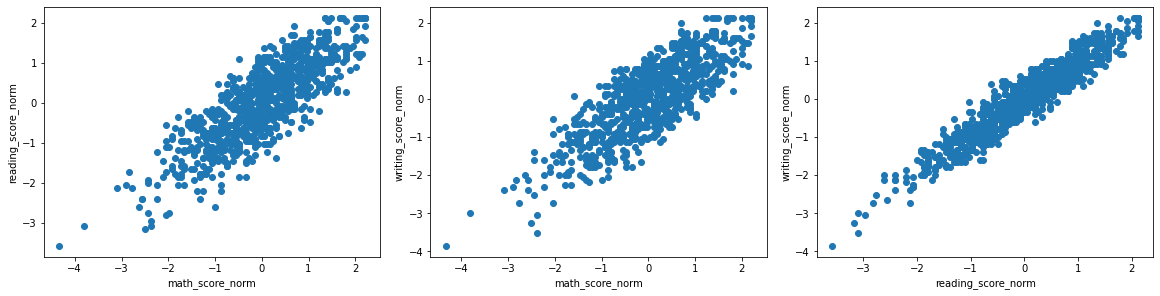

In [10]:
x_norm = ['math_score_norm','math_score_norm','reading_score_norm']
y_norm = ['reading_score_norm','writing_score_norm','writing_score_norm']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,4), constrained_layout=True)
    
for i in range(len(x)):
    axes[i].scatter(df[x_norm[i]],df[y_norm[i]])
    axes[i].set(xlabel=x_norm[i], ylabel=y_norm[i])

plt.show()